In [2]:
SAVED_RESULTS_DIR = "./out"

# Import funman related code
import os
from funman.api.run import Runner
from funman_demo import summarize_results
from funman_demo.example.pde import plot_spatial_timeseries
from IPython.display import HTML
import matplotlib.pyplot as plt
import itertools
from funman import FunmanWorkRequest, EncodingSchedule, POS_INFINITY

import json
from funman.representation.constraint import LinearConstraint, ParameterConstraint, StateVariableConstraint
from funman.representation import Interval
from funman import FUNMANConfig
import logging
from funman_demo import summarize_results



RESOURCES = "../../../resources"

EXAMPLE_DIR = os.path.join(RESOURCES, "amr", "petrinet", "evaluation")
EXAMPLE_DIR = os.path.join(RESOURCES, "amr", "petrinet", "evaluation")
MODEL_PATH = os.path.join(
    EXAMPLE_DIR,"sidarthe.json"
)


In [ ]:
# Consistency M3.3

STATES = ["Susceptible", "Infected","Diagnosed",  "Ailing", "Recognized","Threatened", "Healed",  "Extinct"]

COMPARTMENTS = STATES
MAX_TIME=40
STEP_SIZE=2
to_synthesize=[]

REQUEST_PATH = os.path.join(
    EXAMPLE_DIR, "sidarthe_request_consistency.json"
)

with open(REQUEST_PATH, "r") as request:
    funman_request = FunmanWorkRequest.model_validate(json.load(request))
 
    funman_request.structure_parameters[0].interval.lb = int(MAX_TIME/STEP_SIZE)
    funman_request.structure_parameters[0].interval.ub = int(MAX_TIME/STEP_SIZE)
    funman_request.structure_parameters[1].interval.lb = STEP_SIZE
    funman_request.structure_parameters[1].interval.ub = STEP_SIZE

    results_unconstrained_point = Runner().run(
            MODEL_PATH,
            funman_request,
            description="SIR Consistency",
            case_out_dir=SAVED_RESULTS_DIR,
            dump_results=False
    )
    summary = summarize_results(COMPARTMENTS, results_unconstrained_point, ylabel="Population", synthesized_parameters=to_synthesize+["timestep"])
    print(summary)

[0.04560, 0.04560) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.10000, 0.10000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.00011, 0.00011) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.03000, 0.03000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.01250, 0.01250) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.01250, 0.01250) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.03400, 0.03400) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.57100, 0.57100) has equal lower and upper bounds, so assuming the upper bound is

Total # of ibex-fwdbwd Pruning                @ Pruning level        =           31647
Total # of ibex-fwdbwd Pruning (zero-effect)  @ Pruning level        =           15072
Total time spent in Pruning                   @ Pruning level        =        0.096009 sec
Total time spent in making constraints        @ Pruning level        =        0.000000 sec
Total # of Convert                            @ Ibex Converter       =             204
Total time spent in Converting                @ Ibex Converter       =        0.006480 sec


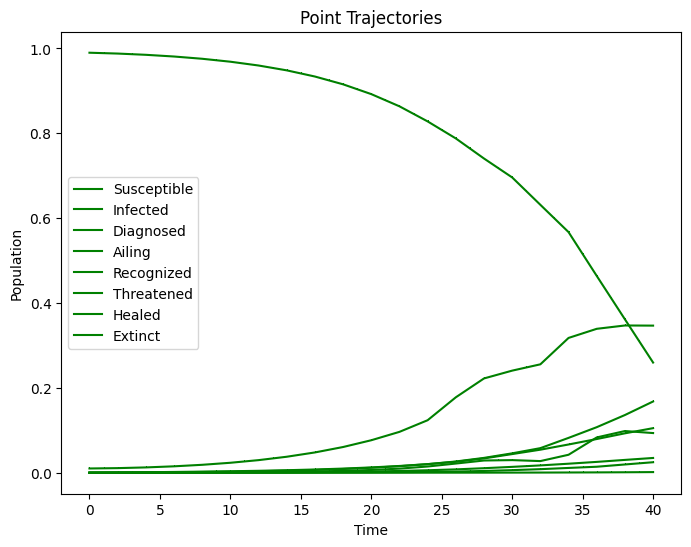

In [2]:
# Parameterization (M3.3)

STATES = ["Susceptible", "Infected","Diagnosed",  "Ailing", "Recognized","Threatened", "Healed",  "Extinct"]
COMPARTMENTS = STATES
MAX_TIME=40
STEP_SIZE=2
to_synthesize=[]

REQUEST_PATH = os.path.join(
    EXAMPLE_DIR, "sidarthe_request_parameterization.json"
)

with open(REQUEST_PATH, "r") as request:
    funman_request = FunmanWorkRequest.model_validate(json.load(request))
 
    funman_request.structure_parameters[0].interval.lb = int(MAX_TIME/STEP_SIZE)
    funman_request.structure_parameters[0].interval.ub = int(MAX_TIME/STEP_SIZE)
    funman_request.structure_parameters[1].interval.lb = STEP_SIZE
    funman_request.structure_parameters[1].interval.ub = STEP_SIZE

    # funman_request.config.dreal_precision = 1e-3
    # funman_request.config.use_compartmental_constraints = False

    results_unconstrained_point = Runner().run(
            MODEL_PATH,
            funman_request,
            description="SIDARTHE Parameterization",
            case_out_dir=SAVED_RESULTS_DIR,
    )
    summary = summarize_results(COMPARTMENTS, results_unconstrained_point, ylabel="Population", synthesized_parameters=to_synthesize+["timestep"])
    print(summary)

In [ ]:
from funman import FunmanResults
import json
import pandas as pd
from datetime import datetime
# Load FUNMAN output and plot the progress data
# data = results_unconstrained_point
with open("out/c633ce05-39ea-4c99-80c8-7d21163a22a9.json", "r") as f:
    data = FunmanResults.model_validate(json.loads(f.read()))
df = pd.DataFrame.from_records(data.timing.progress_timeseries, columns=["time", "progress"])
df.time = pd.to_datetime(df.time)
df.plot.scatter(x="time", y="progress")

[0.04560, 0.04560) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.10000, 0.10000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.00011, 0.00011) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.03000, 0.03000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.01250, 0.01250) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.01250, 0.01250) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.03400, 0.03400) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.57100, 0.57100) has equal lower and upper bounds, so assuming the upper bound is

2024-05-07 18:41:52,151 - funman.server.worker - INFO - Starting work on: 48501ddf-a973-4e23-80dc-71d265004fdd
2024-05-07 18:41:52,461 - funman_dreal.solver - DEBUG - Created new Solver ...
2024-05-07 18:41:52,463 - funman.search.box_search - DEBUG - Expander_S_p17432 entering process loop
2024-05-07 18:41:52,465 - funman.search.box_search - DEBUG - Expanding box: Box(
|+pts|: 0
|-pts|: 0
label: unknown
width: 0.09999999999999997779553950750,
timepoints: [0.00000, 40.00000],
beta:	[0.60000, 0.70000)	(1.00000)
lamb:	[0.01000, 0.02000)	(1.00000)
gamma:	[0.04560, 0.04560]	(0.00000)
alpha:	[0.10000, 0.10000]	(0.00000)
delta:	[0.00011, 0.00011]	(0.00000)
epsilon:	[0.03000, 0.03000]	(0.00000)
zeta:	[0.01250, 0.01250]	(0.00000)
eta:	[0.01250, 0.01250]	(0.00000)
rho:	[0.03400, 0.03400]	(0.00000)
theta:	[0.57100, 0.57100]	(0.00000)
kappa:	[0.01700, 0.01700]	(0.00000)
mu:	[0.01700, 0.01700]	(0.00000)
nu:	[0.02700, 0.02700]	(0.00000)
xi:	[0.01700, 0.01700]	(0.00000)
tau:	[0.01000, 0.01000]	(0.000

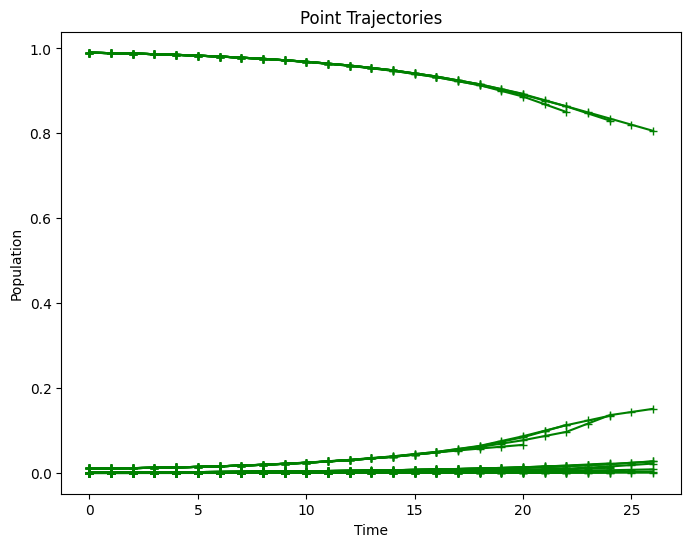

2024-05-07 18:43:05,771 - funman.api.run - INFO - Creating plot of parameter space: ./out/48501ddf-a973-4e23-80dc-71d265004fdd_parameter_space.png
2024-05-07 18:43:06,250 - funman.search.search - DEBUG - empty queue
2024-05-07 18:43:06,281 - funman.search.search - DEBUG - Awaiting join ...


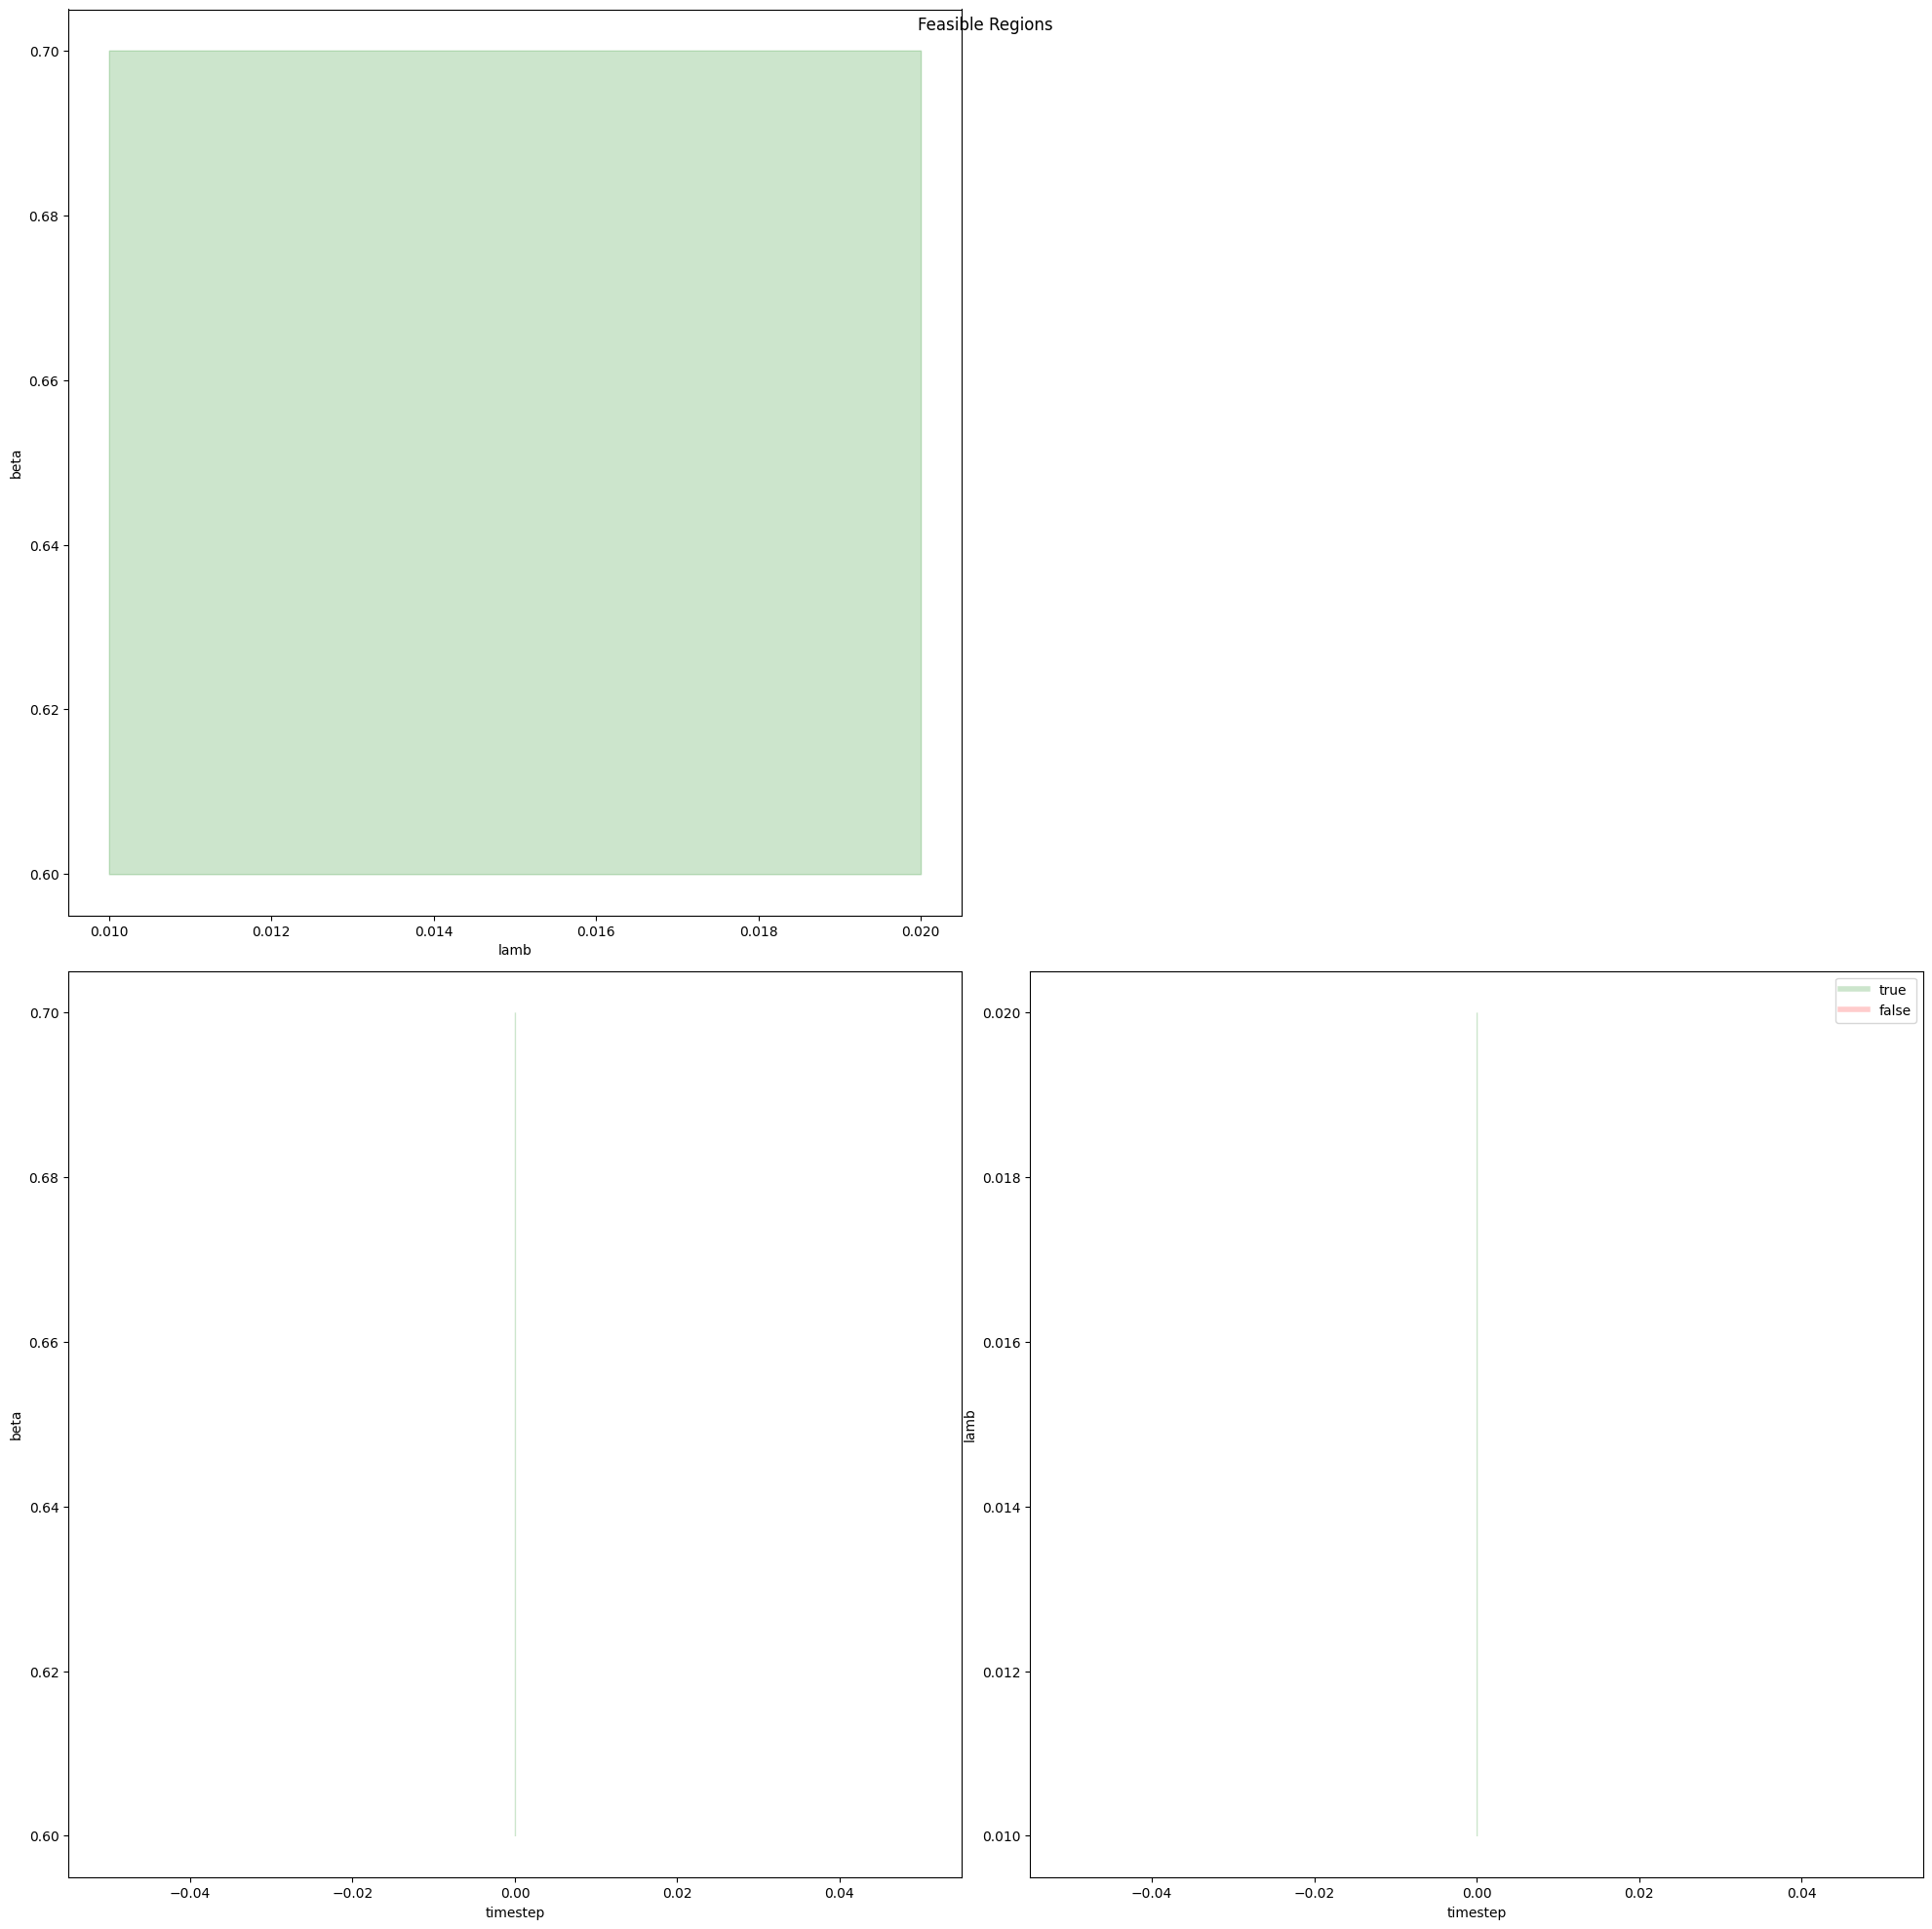

2024-05-07 18:43:07,662 - funman.search.search - DEBUG - Solver completed
2024-05-07 18:43:16,299 - funman.search.search - DEBUG - joined process
2024-05-07 18:43:16,302 - funman.search.search - DEBUG - kill: 2024-05-07 18:43:16.302219
2024-05-07 18:43:16,312 - funman.search.search - DEBUG - Invoking solver ...
2024-05-07 18:43:16,316 - funman.search.search - DEBUG - start: 2024-05-07 18:43:16.316933, with timout: 10
2024-05-07 18:43:16,345 - funman.search.search - DEBUG - Solver started
2024-05-07 18:43:16,353 - funman_dreal.converter - DEBUG - Extracting dreal unsat core expression: True
2024-05-07 18:43:16,373 - funman.search.search - DEBUG - Solver completed
2024-05-07 18:43:16,376 - funman.search.search - DEBUG - signaled q task done
2024-05-07 18:43:16,380 - funman.search.search - DEBUG - Awaiting join ...
2024-05-07 18:43:16,386 - funman.search.search - DEBUG - joined process
2024-05-07 18:43:16,388 - funman.search.search - DEBUG - end: 2024-05-07 18:43:16.388263
2024-05-07 18:4

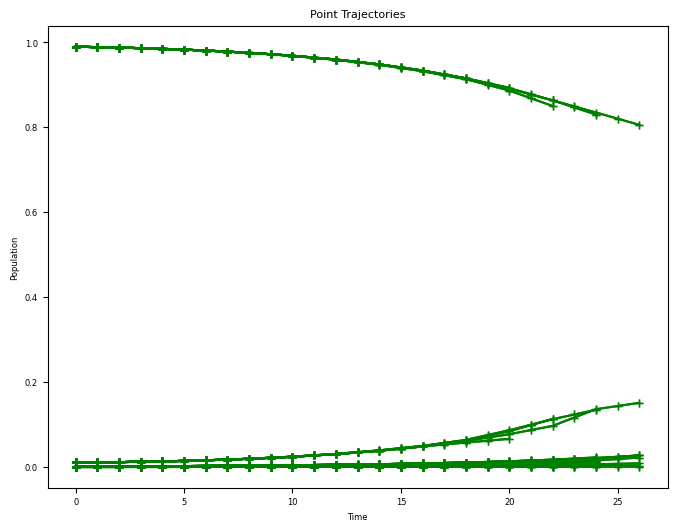

2024-05-07 18:43:19,278 - funman.api.run - INFO - Creating plot of parameter space: ./out/48501ddf-a973-4e23-80dc-71d265004fdd_parameter_space.png


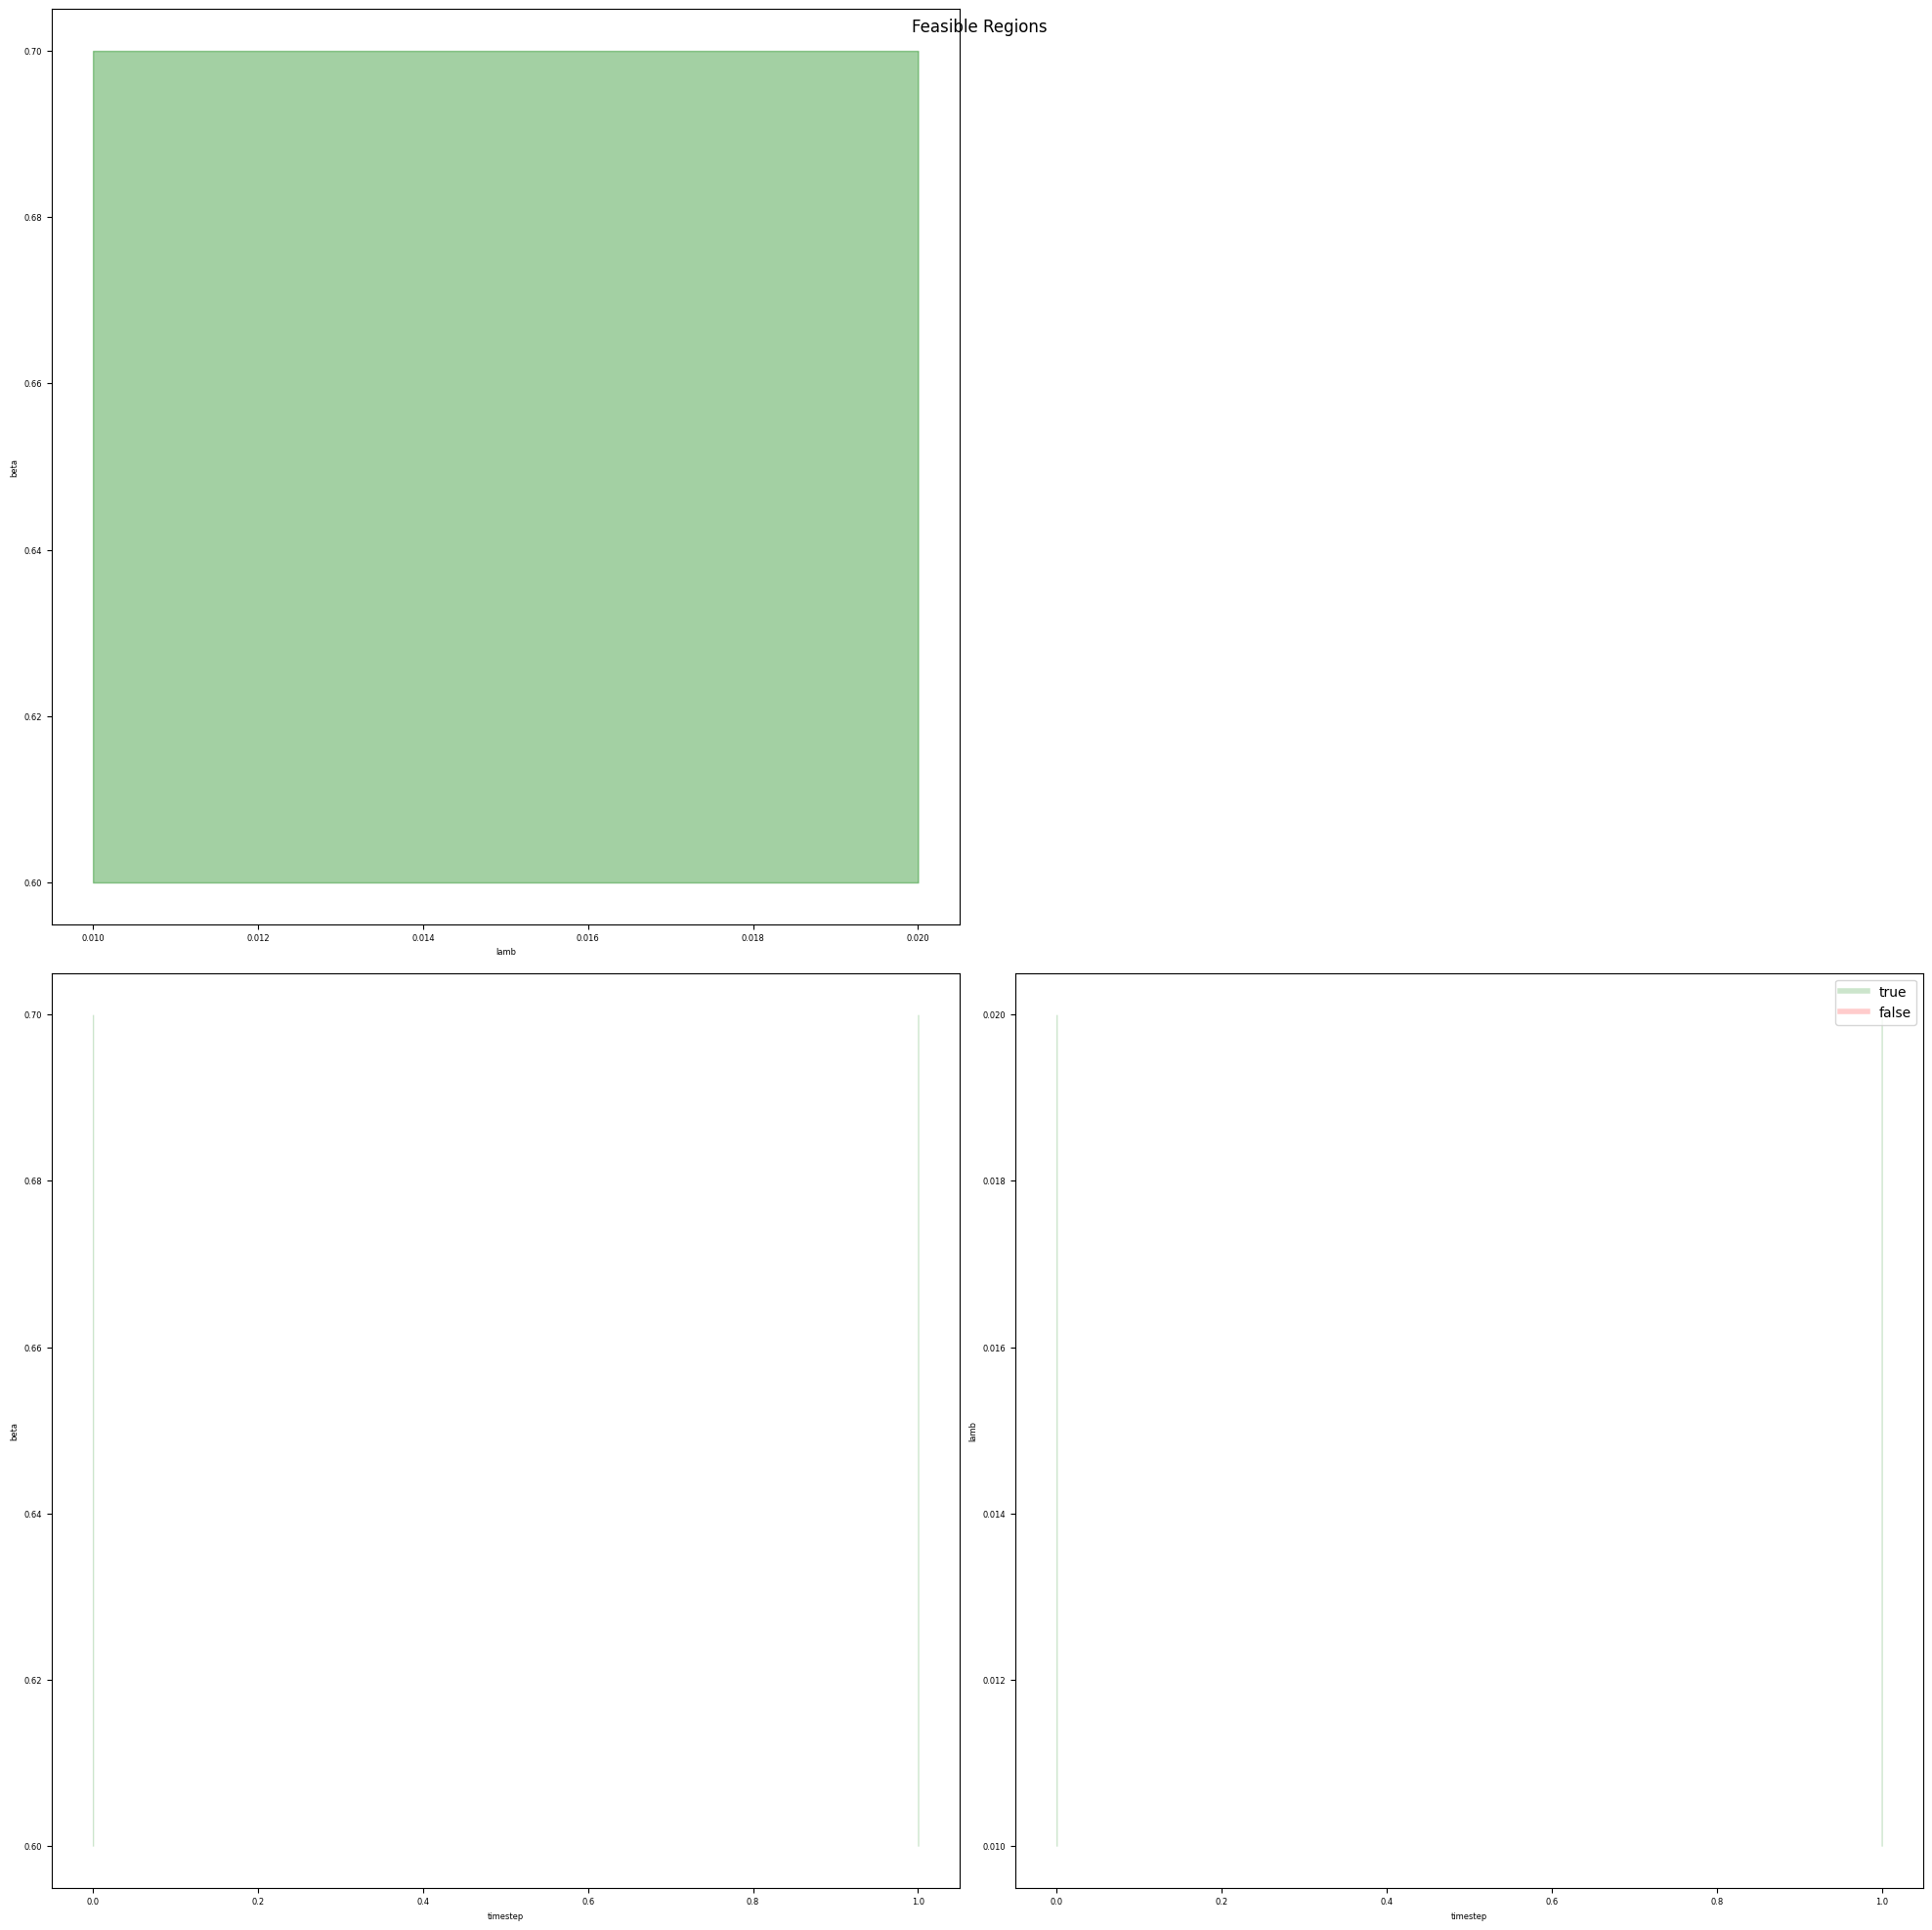

2024-05-07 18:43:25,791 - funman.search.search - DEBUG - Solver completed
2024-05-07 18:43:25,953 - funman.search.search - DEBUG - signaled q task done
2024-05-07 18:43:25,988 - funman.search.search - DEBUG - Awaiting join ...
2024-05-07 18:43:25,999 - funman.search.search - DEBUG - joined process
2024-05-07 18:43:26,006 - funman.search.search - DEBUG - end: 2024-05-07 18:43:26.006471
2024-05-07 18:43:26,023 - /root/funman/src/funman/translate/petrinet.py - DEBUG - Encoding step: 28 to 30
2024-05-07 18:43:26,401 - funman.search.search - DEBUG - Invoking solver ...
2024-05-07 18:43:26,409 - funman.search.search - DEBUG - start: 2024-05-07 18:43:26.409645, with timout: 10
2024-05-07 18:43:26,438 - funman.search.search - DEBUG - Solver started
2024-05-07 18:43:30,366 - funman.api.run - INFO - Dumping results to ./out/48501ddf-a973-4e23-80dc-71d265004fdd.json
2024-05-07 18:43:30,387 - funman.api.run - INFO - Creating plot of point trajectories: ./out/48501ddf-a973-4e23-80dc-71d265004fdd_po

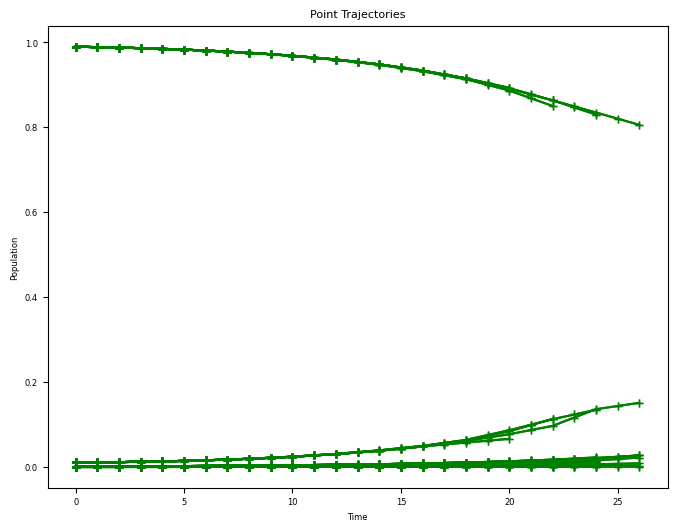

2024-05-07 18:43:32,118 - funman.api.run - INFO - Creating plot of parameter space: ./out/48501ddf-a973-4e23-80dc-71d265004fdd_parameter_space.png


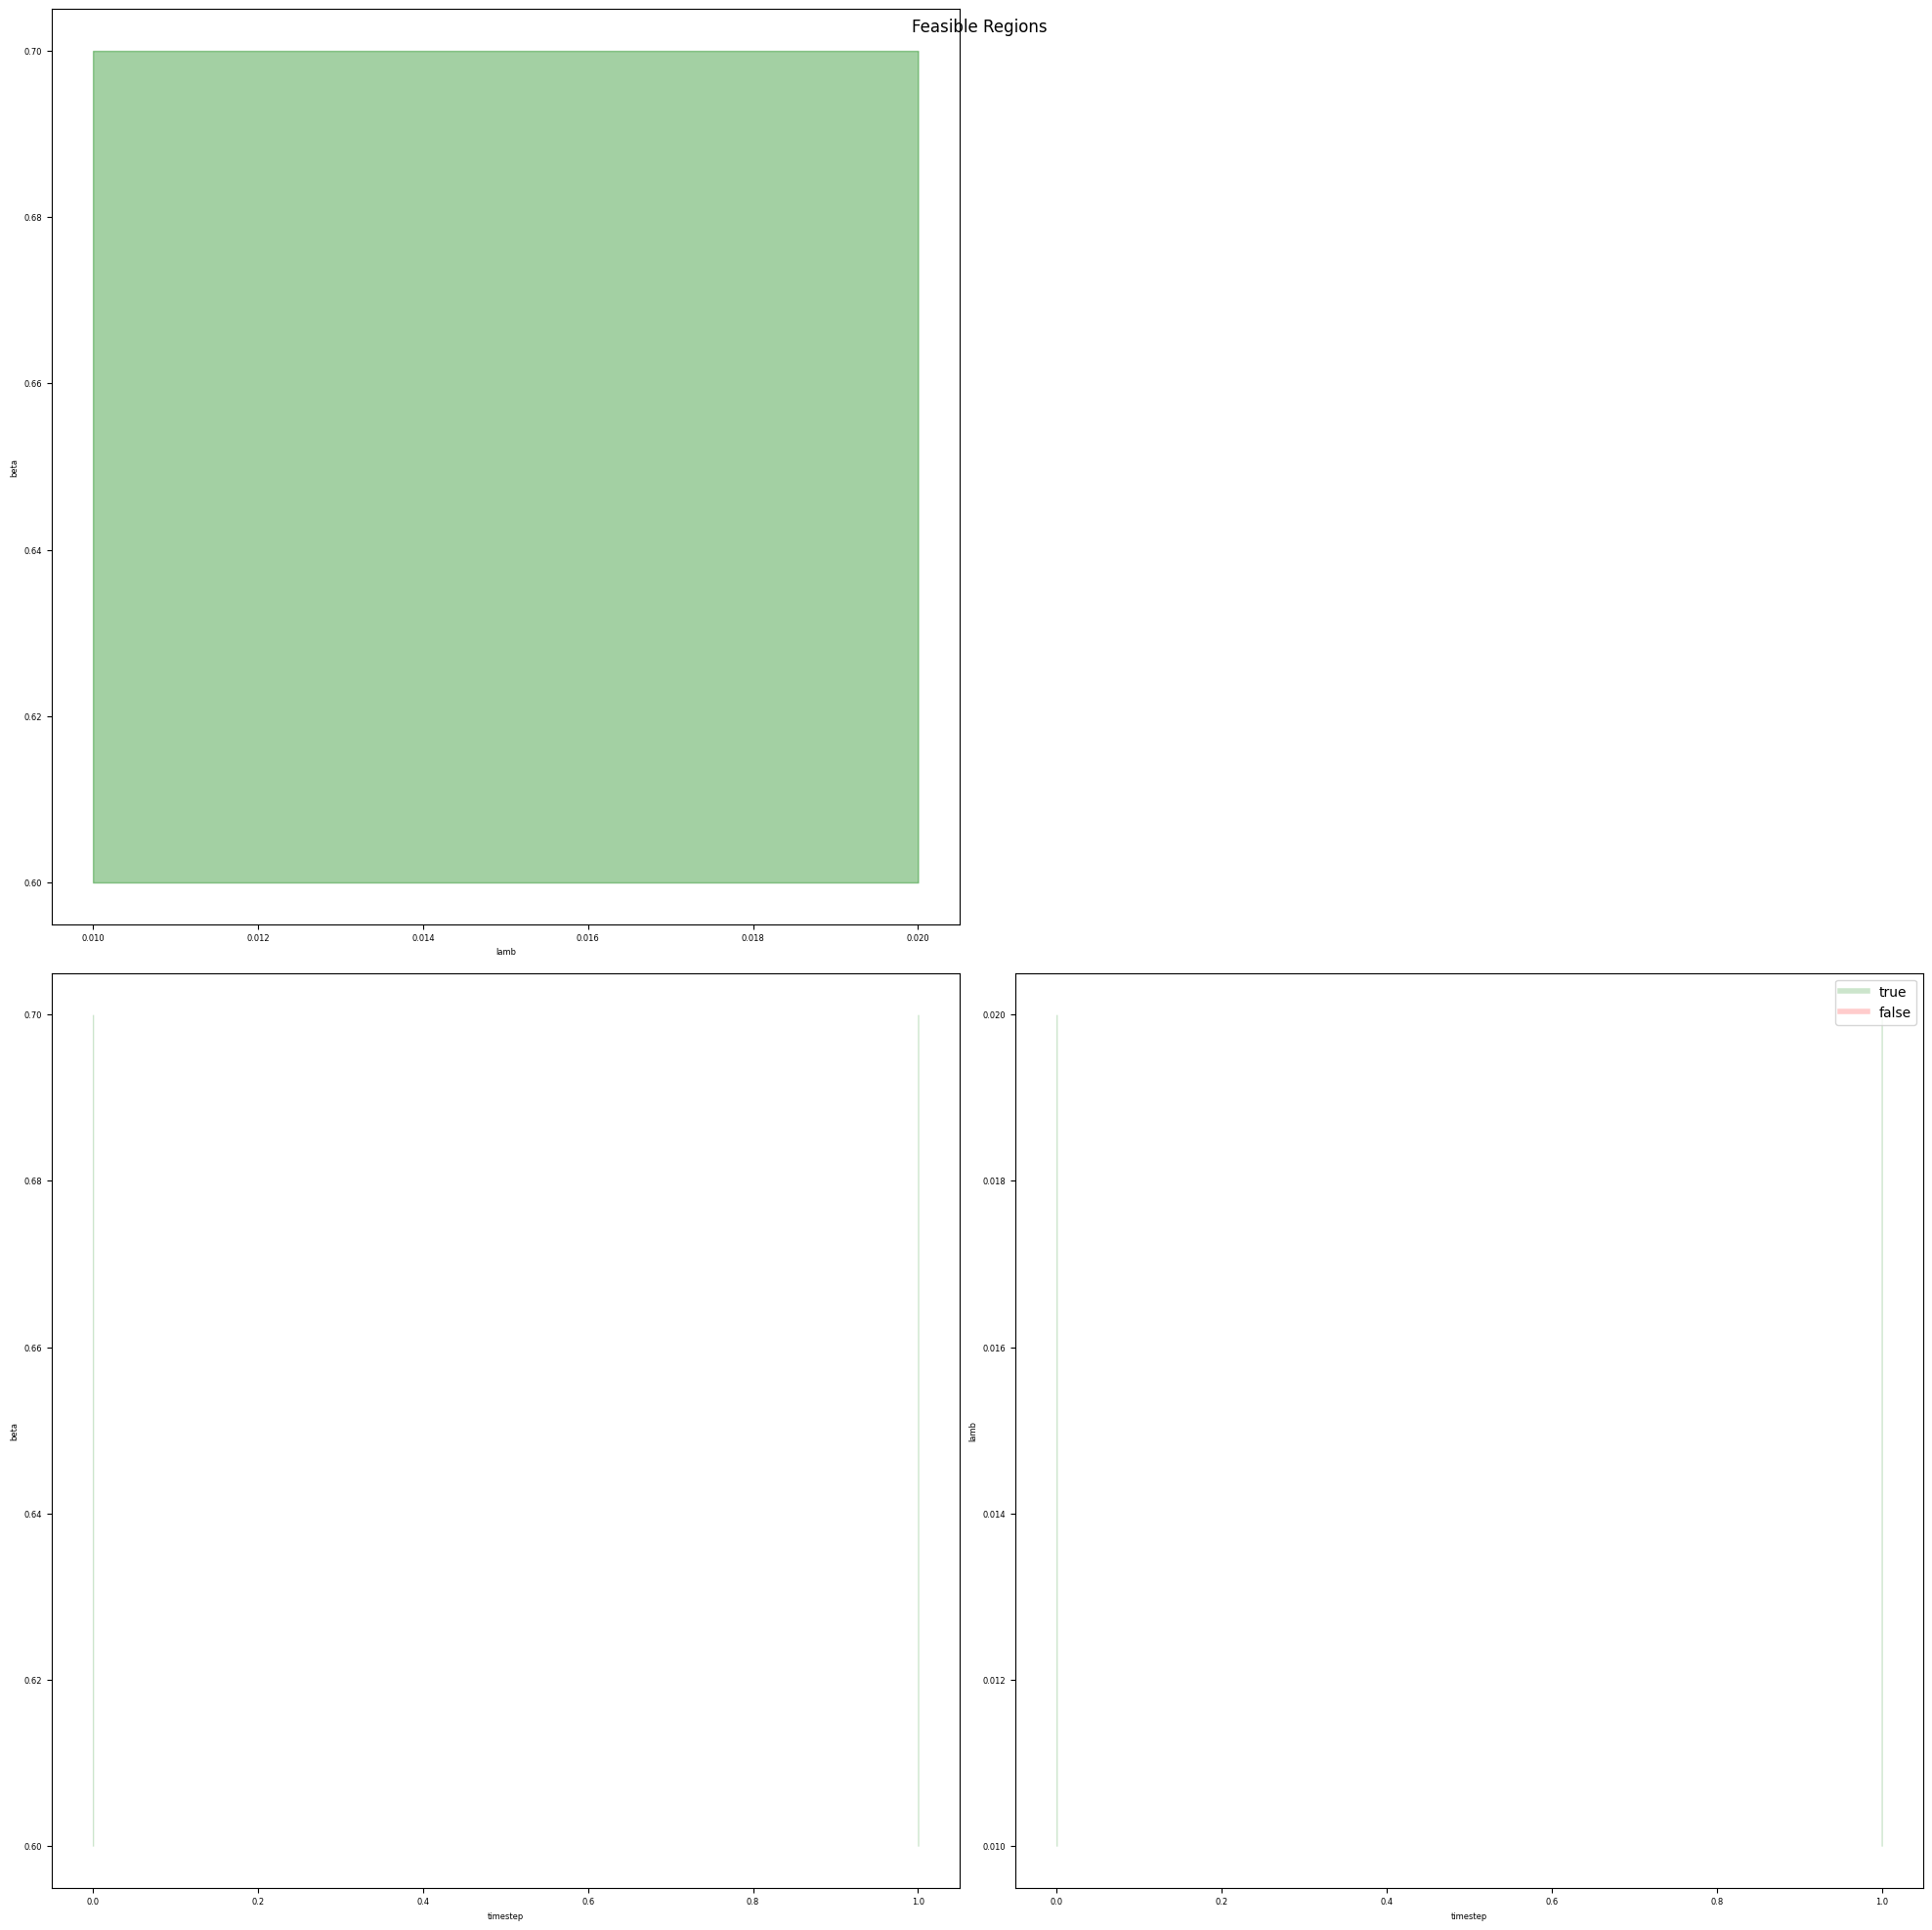

2024-05-07 18:43:36,435 - funman.search.search - DEBUG - empty queue
2024-05-07 18:43:36,438 - funman.search.search - DEBUG - Awaiting join ...
2024-05-07 18:43:38,797 - funman.search.search - DEBUG - Solver completed
2024-05-07 18:43:43,290 - funman.api.run - INFO - Dumping results to ./out/48501ddf-a973-4e23-80dc-71d265004fdd.json
2024-05-07 18:43:43,302 - funman.api.run - INFO - Creating plot of point trajectories: ./out/48501ddf-a973-4e23-80dc-71d265004fdd_points.png


In [4]:
# Parameter Synthesis (M3.3)

STATES = ["Susceptible", "Infected","Diagnosed",  "Ailing", "Recognized","Threatened", "Healed",  "Extinct"]

COMPARTMENTS = STATES
MAX_TIME=40
STEP_SIZE=2
to_synthesize=["beta", "lamb"]

REQUEST_PATH = os.path.join(
    EXAMPLE_DIR, "sidarthe_request_param_synth.json"
)

with open(REQUEST_PATH, "r") as request:
    funman_request = FunmanWorkRequest.model_validate(json.load(request))
 
    funman_request.structure_parameters[0].interval.lb = int(MAX_TIME/STEP_SIZE)
    funman_request.structure_parameters[0].interval.ub = int(MAX_TIME/STEP_SIZE)
    funman_request.structure_parameters[1].interval.lb = STEP_SIZE
    funman_request.structure_parameters[1].interval.ub = STEP_SIZE

    # funman_request.parameter("gamma").interval.lb = 0.025
    # funman_request.parameter("gamma").interval.ub = 0.03
    # funman_request.parameter("beta").interval.lb = 0.13
    # funman_request.parameter("beta").interval.ub = 0.16

    # funman_request.config.substitute_subformulas = True
    # funman_request.config.taylor_series_order = 4
    # series_approximation_threshold = 1e-8
    funman_request.config.verbosity = 10
    # funman_request.config.tolerance = 1e-1
    # funman_request.config.compartmental_constraint_noise = 1e-10
    funman_request.config.solver_timeout = 10
    # funman_request.config.uniform_box_splits = True
    # funman_request.config.num_initial_boxes = 1
    # funman_request.config.dreal_precision = 1e-1

    results_unconstrained_point = Runner().run(
            MODEL_PATH,
            funman_request,
            description="SIR Parameter Synthesis",
            case_out_dir=SAVED_RESULTS_DIR,
            dump_plot=True,
            parameters_to_plot=to_synthesize+["timestep"]
    )
    summary = summarize_results(COMPARTMENTS, results_unconstrained_point, ylabel="Population", parameters_to_plot=to_synthesize+["timestep"], synthesized_parameters=to_synthesize+["timestep"])
    print(summary)